# Homework 1

## Assignment Info
Homework #: HW1 \
Description: Density Histogram \
Course: EN.553.636 Introduction to Data Science \
Semester: Spring 2023, Homewood Campus	\
Instructor: Tamas Budavari \
TA: Matthew Tivnan \
Date: January 27, 2023 

## Student Info
Name: Amir Hossein Daraie \
JHED-ID: adaraie1 \
Email: adaraie1@jhu.edu 

We load data on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)).

In [1]:
import numpy as np
import pandas as pd

stocks = pd.read_csv("stocks.csv")
ret = stocks["Mkt-RF"].values

A _density histogram_ is a histogram that is normalized so that the total area under the bars sums to unity. Argue that the stock return is not normally distributed as follows: 

1. Plot a density histogram of the returns $\texttt{ret}$ with 100 bins. [2 pts]
2. Over this histogram, plot the PDF of a normal distribution with mean equal to the sample mean of the returns and standard deviation equal to the sample standard deviation of the returns. [2 pts]

In [2]:
# Import librarie we need
import matplotlib.pyplot as plt
from scipy.stats import norm

# Density histogram - type 1 

## Here the sum of probabilities is equal to 1. 
## However, the area under the curve is not one. 


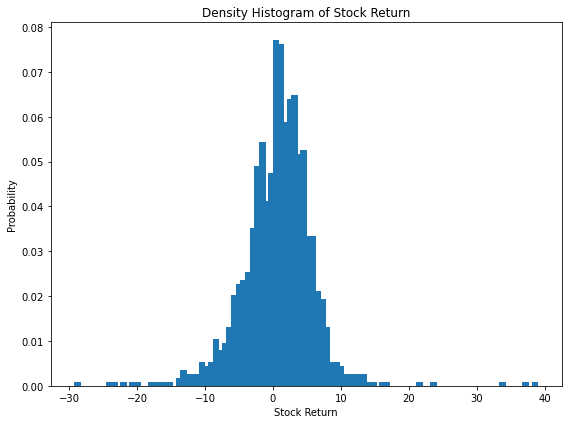

In [4]:
# Calculate histogram and bins
npoints = ret.shape[0]
H, bins = np.histogram(ret, bins=100)
H = H/npoints # convert each bar from count to probability
bins = (bins[:-1] + bins[1:])/2 

# Plot density histogram
plt.figure(figsize=(8,6))
plt.bar(bins,H,width=1)
plt.title("Density Histogram of Stock Return")
plt.xlabel("Stock Return")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

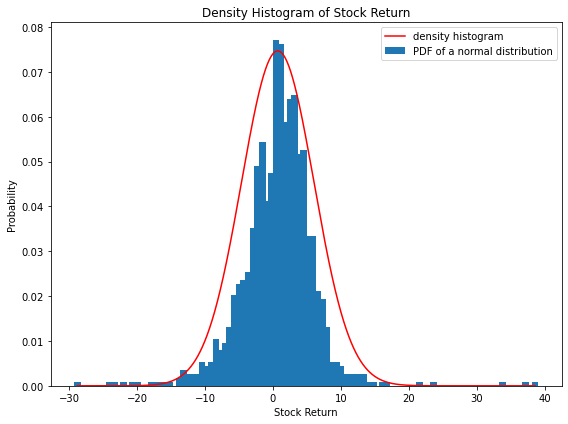

In [5]:
# plot the PDF of a normal distribution 

# Plot between a min and max value on x with 0.01 steps.
x_axis = np.arange(bins.min(), bins.max(), 0.01)
  
# Calculating mean and standard deviation
mean = np.mean(ret)
sd = np.std(ret)
  
# Plot density histogram & PDF of a normal distribution
plt.figure(figsize=(8,6))
plt.bar(bins,H,width=1)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd), c='r')
plt.title("Density Histogram of Stock Return")
plt.xlabel("Stock Return")
plt.ylabel("Probability")
plt.legend(["PDF of a normal distribution","Density histogram"])
plt.tight_layout()
plt.show()

# Density histogram - type 2

## Here the sum of probabilities is equal to 1. 
## However, the area under the curve is not one. 


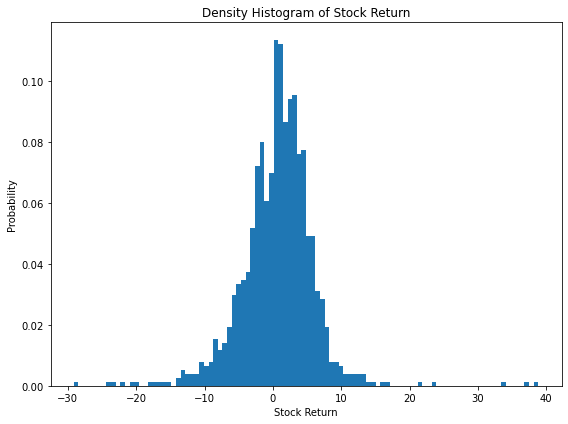

In [9]:
# Plot density histogram
plt.figure(figsize=(8,6))
plt.hist(ret,density=1,bins=100) # Calculate histogram and bins
plt.title("Density Histogram of Stock Return")
plt.xlabel("Stock Return")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

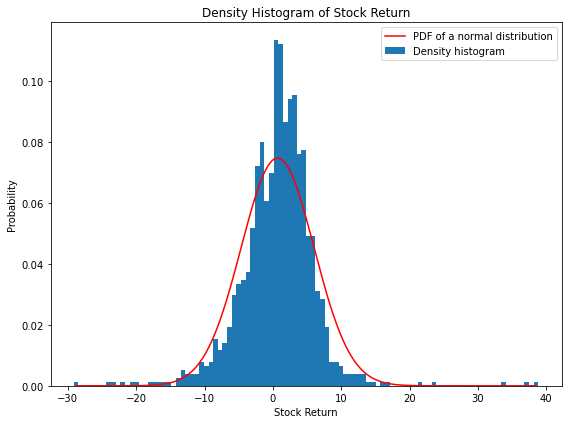

In [11]:
# Plot density histogram
plt.figure(figsize=(8,6))
plt.hist(ret,density=1,bins=100) # Calculate histogram and bins
plt.plot(x_axis, norm.pdf(x_axis, mean, sd), c='r')
plt.title("Density Histogram of Stock Return")
plt.legend(["PDF of a normal distribution","Density histogram"])
plt.xlabel("Stock Return")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()

3. Explain why stock returns are not normally distributed. [2 pts]

If we assume that they are normally distributed, it comes with a big cost. In terms of generality, it's a very severe simplifying assumption, especially because those deviation from normality (red plot) more often than not, they can be pretty severe. 

Henceforth, because of many deviatiosn from normality, it is difficult to simplify them as a set of numbers from normal distribution. This deviation can be calculated as follows:

In [12]:
dev = norm.pdf(bins, mean, sd) - H
np.sum(dev)

0.47102087153281097

And as you can appreciate here with numbers, it is something hard to ingore.

((array([-3.23517591, -2.97281634, -2.82659123, ...,  2.82659123,
          2.97281634,  3.23517591]),
  array([-29.13, -23.82, -23.24, ...,  33.84,  37.06,  38.85])),
 (5.124406794033834, 0.6899035087719304, 0.9571273382308075))

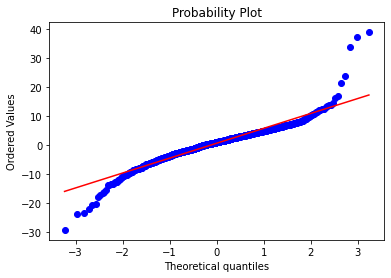

In [15]:
from scipy.stats import probplot
probplot(ret, dist="norm", plot=plt)

Also, please note that the QQ plot also shows that the distribution is not normal. The tails diverge. 